       y  x       time  lat  lon        n2     trend
depth                                               
-0.5   0  0 2000-12-31    0    0 -0.000390  0.001643
-0.5   0  0 2001-12-31    0    0 -0.005244  0.001275
-0.5   0  0 2002-12-31    0    0  0.007474  0.000911
-0.5   0  0 2003-12-31    0    0  0.011302  0.000546
-0.5   0  0 2004-12-31    0    0 -0.016008  0.000182
...   .. ..        ...  ...  ...       ...       ...
-38.5  4  1 2005-12-31    4    1 -0.016717 -0.001040
-38.5  4  1 2006-12-31    4    1 -0.002574 -0.003102
-38.5  4  1 2007-12-31    4    1 -0.004938 -0.005144
-38.5  4  1 2008-12-31    4    1 -0.033431 -0.007185
-38.5  4  1 2009-12-31    4    1  0.007736 -0.009227

[3900 rows x 7 columns]


/Users/trondkr/anaconda3/envs/gcs2/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


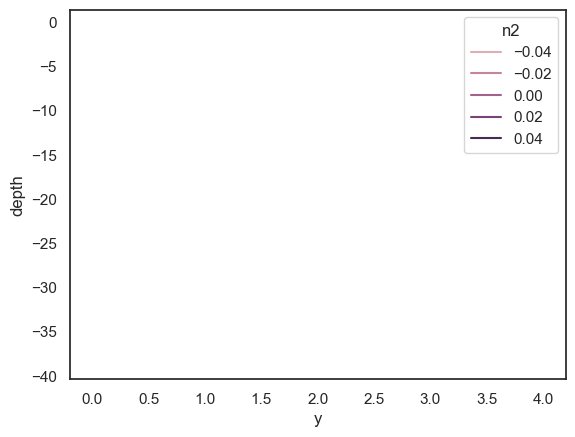

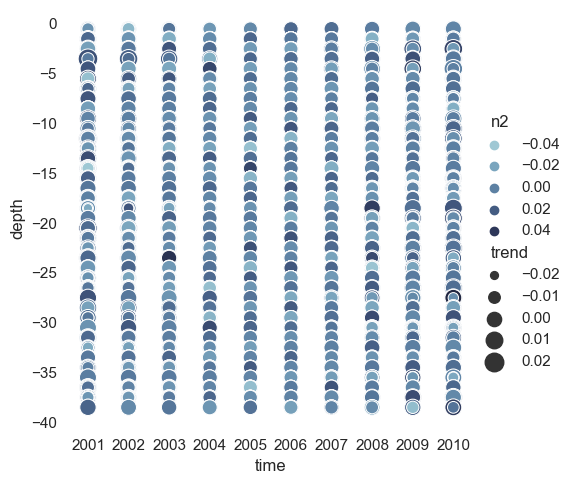

In [42]:
import pytest
import gsw_xarray as gsw
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xclim.sdba.detrending import PolyDetrend

def calculate_trend(da: xr.DataArray):
    da = da.chunk(chunks={'time':-1})
    # Create the detrending object
    det = PolyDetrend(group="time", degree=1, preserve_mean=True, kind="+")
    # Fitting returns a new object and computes the trend.
    da_fit = det.fit(da)

    da_detrended = da_fit.detrend(da)
    return da - da_detrended

def plot_n2():
    ds_n2 = xr.open_dataset("../tests/test_data/n2.nc").sel(time=slice("2000-01-01", "2010-01-01"))
    ds = ds_n2.transpose("time", "depth", "y", "x")

    sns.set_theme(style="white")

    fig, ax = plt.subplots()
    ds = ds.assign(trend=calculate_trend(ds["n2"]))
    ds = ds.resample(time="A").mean()

    ds = ds.assign(depth=-ds["depth"])
    df = ds.to_dataframe().reset_index()
    df = df.set_index("depth")

    print(df)
    sns.lineplot(data=df, hue="n2", x="y", y="depth")

    plt.show()

    cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    g = sns.relplot(
        data=df,
        x="time", y="depth",
        hue="n2", size="trend",
        palette=cmap, sizes=(10, 200),
    )
   # g.set(xscale="log", yscale="log")
    g.ax.xaxis.grid(True, "minor", linewidth=.25)
    g.ax.yaxis.grid(True, "minor", linewidth=.25)
    g.despine(left=True, bottom=True)


plot_n2()
